In [25]:
import random 
import string
import pandas as pd
import matplotlib.pyplot as plt
import math
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import seaborn as sns

# Cleanup! 

In [26]:
df = pd.read_csv(r'/kaggle/input/student-academic-grades-and-programs/StudentGradesAndPrograms.csv', low_memory=False)

In [27]:
df.sample(3)

,schoolyear,gradeLevel,classPeriod,classType,schoolName,gradePercentage,avid,sped,migrant,ell,student_ID
77340,2024-2025,02,6,ENG,Gale Elementary School,93.3,Y,N,N,N,R9K1VW8D4
5441,2022-2023,02,4,PE,Gale Elementary School,100.0,Y,N,N,N,6O0L5BQB0
157193,2023-2024,08,2,PE,East Junior High,70.0,N,N,N,N,ZR4U1S12K


In [28]:
#This max values for gradePercentage are silly so I'll remove them later.
df.describe()

,gradePercentage
count,200994.000000
mean,81.183078
std,24.594533
min,0.000000
25%,72.800000
50%,88.500000
75%,97.900000
max,2000.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200994 entries, 0 to 200993
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   schoolyear       200994 non-null  object 
 1   gradeLevel       200994 non-null  object 
 2   classPeriod      200994 non-null  object 
 3   classType        200994 non-null  object 
 4   schoolName       200994 non-null  object 
 5   gradePercentage  200994 non-null  float64
 6   avid             200994 non-null  object 
 7   sped             200994 non-null  object 
 8   migrant          200994 non-null  object 
 9   ell              200994 non-null  object 
 10  student_ID       200994 non-null  object 
dtypes: float64(1), object(10)
memory usage: 16.9+ MB


# Anonymizing Student IDs

In [30]:
# student_id_to_fake_id = {}

# def generate_random_id():
#     """Generate a random alphanumeric ID."""
#     letters = ''.join(random.choices(string.ascii_uppercase, k=5))
#     numbers = ''.join(random.choices(string.digits, k=4))
#     return ''.join(random.sample(letters + numbers, 9))

# def anonymize_and_replace_student_ids(data, studentID):
#     """
#     This is how I hide student IDs and make sure the random ID assigned to a real ID 
#     by scrambling them and then making sure the scrambled ID is the same if the student is 
#     in the district multiple years.
    
#     Parameters:
#         data (pd.DataFrame): The DataFrame containing the 'studentID' column to anonymize.
#         studentID (str): The column name of the student ID.
    
#     Returns:
#         pd.DataFrame: The DataFrame with the 'studentID' column replaced by 'fake_id'.
#     """
#     global student_id_to_fake_id
#     unique_sis_numbers = data[studentID].drop_duplicates().reset_index(drop=True)

#     # Generate fake IDs for each unique student ID
#     for sis in unique_sis_numbers:
#         if sis not in student_id_to_fake_id:
#             student_id_to_fake_id[sis] = generate_random_id()

#     data['fake_id'] = data[studentID].map(student_id_to_fake_id).fillna(data[studentID])
#     data = data.drop(columns=[studentID], inplace = True)
#     return data

In [31]:
# anonymize_and_replace_student_ids(df, 'studentID')

In [32]:
#Removing grade percentages where the percentage is over 100%. Those are clearly errors.
df = df[df['gradePercentage'] <= 100]

# Class Types Description
IN:Inactive

MAT:Mathematics

SOC:Social Studies

ES:Elementary School, used as a placeholder for 'Homeroom'

ART:Art

PE:Physical Education

ELE:Elective

ENG:English

MS:Middle School, used as a placeholder for 'Homeroom'

SCI:Science

MUS:Music

HB:Homebound, students who are homebound and do not physically go to school, but still receive district services. 

I'll remove the class types of ``HB``, ``ES``, and ``MS`` because I feel that they don't contribute significantly to the grade percentage. 

In [33]:
df = df.drop(df[df['classType'].isin(['HB', 'ES', 'MS', 'IN'])].index)

In [34]:
conditions = [
    (df['gradePercentage'] >= 90),
    (df['gradePercentage'] >= 80),
    (df['gradePercentage'] >= 70),
    (df['gradePercentage'] >= 60)
]
choices = ['A', 'B', 'C', 'D']

# Use np.select to apply the conditions
df['letterGrade'] = np.select(conditions, choices, default='F')

In [35]:
df18 = df[df['schoolyear'] == '2018-2019']
df20 = df[df['schoolyear'] == '2020-2021']
df21 = df[df['schoolyear'] == '2021-2022']
df22 = df[df['schoolyear'] == '2022-2023']
df23 = df[df['schoolyear'] == '2023-2024']
df24 = df[df['schoolyear'] == '2024-2025']

In [36]:
df24.describe()

,gradePercentage
count,53254.000000
mean,84.791032
std,18.756738
min,0.000000
25%,77.500000
50%,90.900000
75%,100.000000
max,100.000000


In [37]:
df23.describe()

,gradePercentage
count,49714.000000
mean,84.358366
std,18.358326
min,0.000000
25%,76.800000
50%,90.000000
75%,98.800000
max,100.000000


In [38]:
df22.describe()

,gradePercentage
count,33155.000000
mean,82.498269
std,20.804374
min,0.000000
25%,75.000000
50%,89.500000
75%,97.800000
max,100.000000


In [39]:
df21.describe()

,gradePercentage
count,20578.000000
mean,77.706814
std,22.134185
min,0.000000
25%,67.100000
50%,84.400000
75%,94.900000
max,100.000000


# Student Group Distribution

In [40]:
avidValuecounts23 = df23['avid'].value_counts().reset_index()
spedValuecounts23 = df23['sped'].value_counts().reset_index()
migrantValuecounts23 = df23['migrant'].value_counts().reset_index()
ellValuecounts23 = df23['ell'].value_counts().reset_index()

In [41]:
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "pie"}, {"type": "pie"}],
           [{"type": "pie"}, {"type": "pie"}]],
    subplot_titles=("avid Students", "sped Students", "migrant Students", "ell Students")
)

fig.add_trace(go.Pie(labels=avidValuecounts23['avid'], values=avidValuecounts23['count']), row=1, col=1)
fig.add_trace(go.Pie(labels=spedValuecounts23['sped'], values=spedValuecounts23['count']), row=1, col=2)
fig.add_trace(go.Pie(labels=migrantValuecounts23['migrant'], values=migrantValuecounts23['count']), row=2, col=1)
fig.add_trace(go.Pie(labels=ellValuecounts23['ell'], values=ellValuecounts23['count']), row=2, col=2)



fig.update_layout(
    title_text="Student Groups Distribution - Overall District 2023-2024",
    height=600, width=800
)

fig.show()


In [42]:
avidValuecounts24 = df24['avid' ].value_counts().reset_index()
spedValuecounts24 = df24['sped'].value_counts().reset_index()
migrantValuecounts24 = df24['migrant'].value_counts().reset_index()
ellValuecounts24 = df24['ell'].value_counts().reset_index()

In [43]:
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "pie"}, {"type": "pie"}],
           [{"type": "pie"}, {"type": "pie"}]],
    subplot_titles=("avid Students", "sped Students", "migrant Students", "ell Students")
)

fig.add_trace(go.Pie(labels=avidValuecounts24['avid'], values=avidValuecounts24['count']), row=1, col=1)
fig.add_trace(go.Pie(labels=spedValuecounts24['sped'], values=spedValuecounts24['count']), row=1, col=2)
fig.add_trace(go.Pie(labels=migrantValuecounts24['migrant'], values=migrantValuecounts24['count']), row=2, col=1)
fig.add_trace(go.Pie(labels=ellValuecounts24['ell'], values=ellValuecounts24['count']), row=2, col=2)


fig.update_layout(
    title_text="Student Groups Distribution - Overall District 2024-2025",
    height=600, width=800
)

fig.show()

In [44]:
avidValuecounts24 = df24.groupby(['schoolName', 'avid']).size().reset_index(name='count')
spedValuecounts24 = df24.groupby(['schoolName', 'sped']).size().reset_index(name='count')
migrantValuecounts24 = df24.groupby(['schoolName', 'migrant']).size().reset_index(name='count')
ellValuecounts24 = df24.groupby(['schoolName', 'ell']).size().reset_index(name='count')

avidValuecounts23 = df23.groupby(['schoolName', 'avid']).size().reset_index(name='count')
spedValuecounts23 = df23.groupby(['schoolName', 'sped']).size().reset_index(name='count')
migrantValuecounts23 = df23.groupby(['schoolName', 'migrant']).size().reset_index(name='count')
ellValuecounts23 = df23.groupby(['schoolName', 'ell']).size().reset_index(name='count')

In [45]:
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{"type": "pie"}, {"type": "pie"}],
           [{"type": "pie"}, {"type": "pie"}]],
    subplot_titles=("avid Students", "sped Students", "migrant Students", "ell Students")
)

fig.add_trace(go.Pie(labels=avidValuecounts24['avid'], values=avidValuecounts24['count']), row=1, col=1)
fig.add_trace(go.Pie(labels=spedValuecounts24['sped'], values=spedValuecounts24['count']), row=1, col=2)
fig.add_trace(go.Pie(labels=migrantValuecounts24['migrant'], values=migrantValuecounts24['count']), row=2, col=1)
fig.add_trace(go.Pie(labels=ellValuecounts24['ell'], values=ellValuecounts24['count']), row=2, col=2)


fig.update_layout(
    title_text="Student Groups Distribution - Overall District 2024-2025",
    height=600, width=800
)

fig.show()

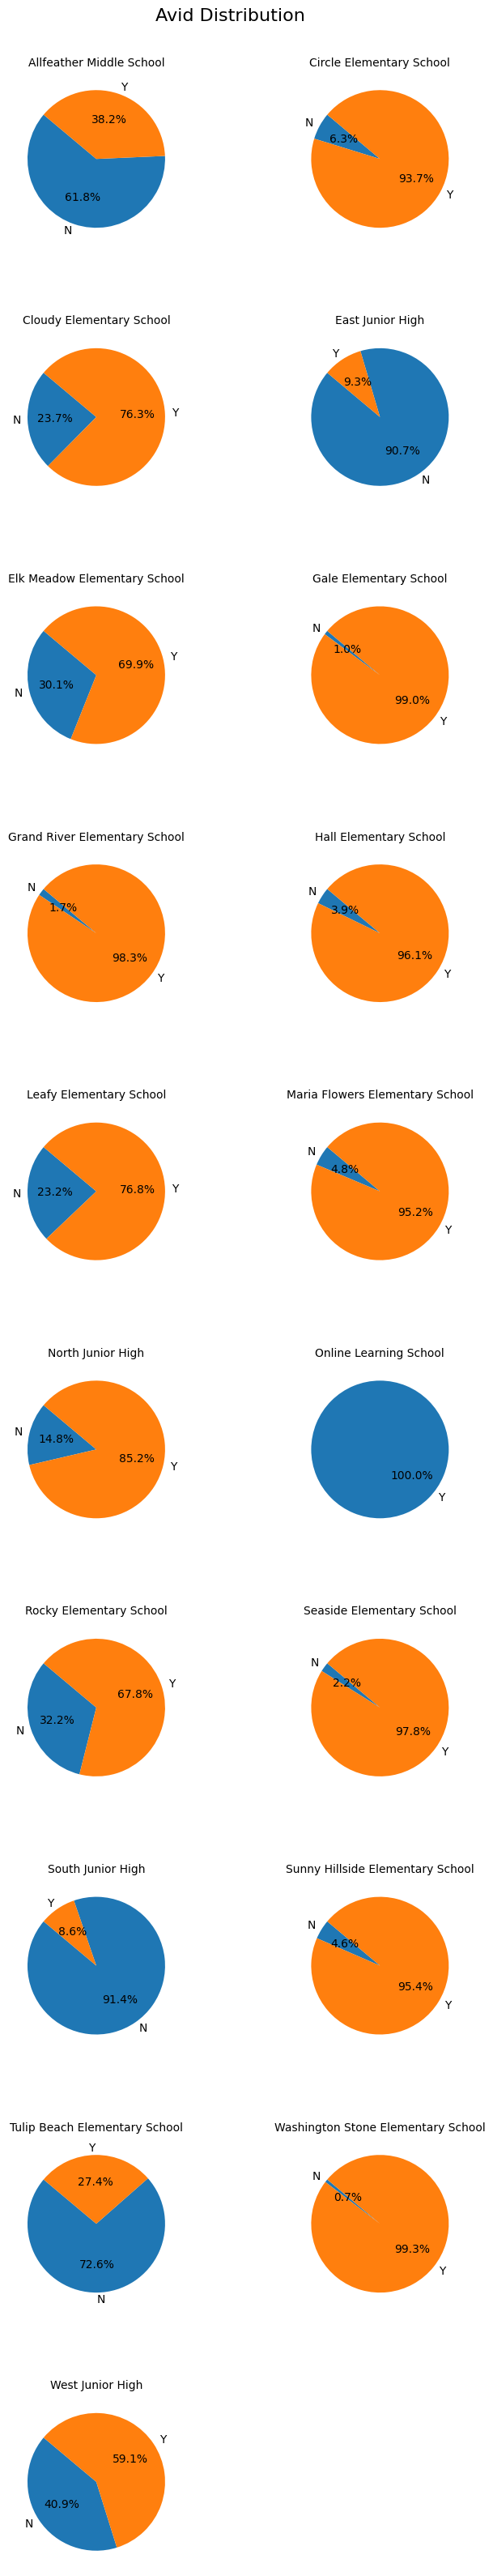

In [46]:
avidValuecounts24 = df24.groupby(['schoolName', 'avid']).size().reset_index(name='count')

schools = avidValuecounts24['schoolName'].unique()
num_schools = len(schools)
rows = math.ceil(num_schools / 2)  
cols = 2 

fig, axes = plt.subplots(rows, cols, figsize=(8, rows * 4))  
axes = axes.flatten()  

for i, school in enumerate(schools):
    school_data = avidValuecounts24[avidValuecounts24['schoolName'] == school]
    labels = school_data['avid'] 
    sizes = school_data['count'] 
    
    axes[i].pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140
    )
    axes[i].set_title(f"{school}", fontsize=10)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Avid Distribution", fontsize=16, y=0.90)  # Adjust `y` to position the title

plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()


# Student Group Percent Change Over Year

In [47]:
percchange = pd.merge(avidValuecounts23, avidValuecounts24, on=['schoolName', 'avid'], suffixes=('_23', '_24'))
percchange = percchange[percchange['avid'] == 'Y']

#Calculate Percentage Change
percchange['Percentage Change'] = ((percchange['count_24'] - percchange['count_23']) / percchange['count_23']) * 100


percchange['Change Type'] = percchange['Percentage Change'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')

fig = px.bar(percchange,
             y='schoolName',  
             x='Percentage Change',
             color='Change Type',
             color_discrete_map={'Positive': 'green', 'Negative': 'red'},
             title="Percentage Change in avid Students from 23-24 to 24-25",
             labels={'Percentage Change': 'Percentage (%)', 'schoolName': 'School Name', 'Change Type': 'Change Type'})

fig.update_layout(
    barmode='group', 
    yaxis=dict(categoryorder='total ascending'),
    height=800 ,    width = 1000
)

fig.show()

In [48]:
percchange = pd.merge(spedValuecounts23, spedValuecounts24, on=['schoolName', 'sped'], suffixes=('_23', '_24'))
percchange = percchange[percchange['sped'] == 'Y']
percchange['Percentage Change'] = ((percchange['count_24'] - percchange['count_23']) / percchange['count_23']) * 100
percchange['Change Type'] = percchange['Percentage Change'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')

fig = px.bar(percchange,
             y='schoolName',  
             x='Percentage Change',
             color='Change Type',  
             color_discrete_map={'Positive': 'green', 'Negative': 'red'},  
             title="Percentage Change in sped Students from 23-24 to 24-25",
             labels={'Percentage Change': 'Percentage (%)', 'schoolName': 'School Name', 'Change Type': 'Change Type'})

fig.update_layout(
    barmode='group', 
    yaxis=dict(categoryorder='total ascending'),
    height=800 ,    width = 1000
)

fig.show()

In [49]:
percchange = pd.merge(migrantValuecounts23, migrantValuecounts24, on=['schoolName', 'migrant'], suffixes=('_23', '_24'))
percchange = percchange[percchange['migrant'] == 'Y']
percchange['Percentage Change'] = ((percchange['count_24'] - percchange['count_23']) / percchange['count_23']) * 100
percchange['Change Type'] = percchange['Percentage Change'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')

fig = px.bar(percchange,
             y='schoolName',
             x='Percentage Change',
             color='Change Type', 
             color_discrete_map={'Positive': 'green', 'Negative': 'red'},
             title="Percentage Change in migrant Students from 23-24 to 24-25",
             labels={'Percentage Change': 'Percentage (%)', 'schoolName': 'School Name', 'Change Type': 'Change Type'})

fig.update_layout(
    barmode='group', 
    yaxis=dict(categoryorder='total ascending'),
    height=800 ,    width = 1000
)

fig.show()

In [50]:
percchange = pd.merge(ellValuecounts23, ellValuecounts24, on=['schoolName', 'ell'], suffixes=('_23', '_24'))
percchange = percchange[percchange['ell'] == 'Y']
percchange['Percentage Change'] = ((percchange['count_24'] - percchange['count_23']) / percchange['count_23']) * 100
percchange['Change Type'] = percchange['Percentage Change'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')

fig = px.bar(percchange,
             y='schoolName', 
             x='Percentage Change',
             color='Change Type',  
             color_discrete_map={'Positive': 'green', 'Negative': 'red'}, 
             title="Percentage Change in ell Students from 23-24 to 24-25",
             labels={'Percentage Change': 'Percentage (%)', 'schoolName': 'School Name', 'Change Type': 'Change Type'})

fig.update_layout(
    barmode='group', 
    yaxis=dict(categoryorder='total ascending'),
    height=800 ,    width = 1000
)

fig.show()

# Grade Percentages

In [51]:
df_sorted = df.sort_values(by='gradePercentage', ascending=False)
df_sorted

,schoolyear,gradeLevel,classPeriod,classType,schoolName,gradePercentage,avid,sped,migrant,ell,student_ID,letterGrade
3255,2018-2019,08,3,MUS,Allfeather Middle School,100.0,N,N,N,N,7V37YAB2F,A
28466,2024-2025,02,9,SOC,Grand River Elementary School,100.0,Y,Y,N,N,411LPZMX5,A
28460,2024-2025,04,2,ART,Seaside Elementary School,100.0,Y,N,Y,N,5935YPBUS,A
28461,2024-2025,06,4,ELE,North Junior High,100.0,Y,N,N,N,4BIE3U74H,A
28462,2024-2025,06,6,SCI,North Junior High,100.0,Y,N,N,N,4BIE3U74H,A
...,...,...,...,...,...,...,...,...,...,...,...,...
199057,2020-2021,06,4,SCI,East Junior High,0.0,N,N,Y,N,1JB3YAT87,F
199056,2020-2021,08,3,ELE,Allfeather Middle School,0.0,N,Y,N,N,J0X51IEN3,F
199055,2020-2021,08,1,ELE,Allfeather Middle School,0.0,N,Y,N,N,J0X51IEN3,F
199054,2020-2021,07,5,ELE,North Junior High,0.0,N,N,N,N,9D0JLIA21,F


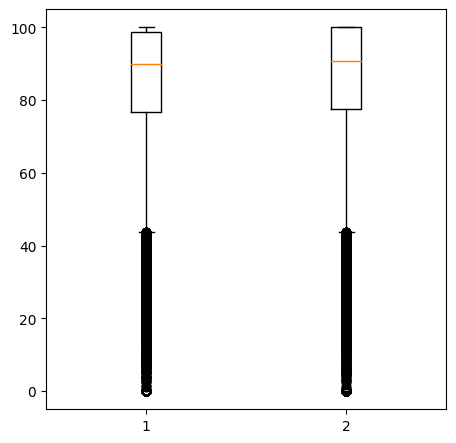

In [52]:
data = [df23['gradePercentage'], df24['gradePercentage']]

fig = plt.figure(figsize =(4, 4))

ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(data)
plt.show()

#These results are stupid lol 

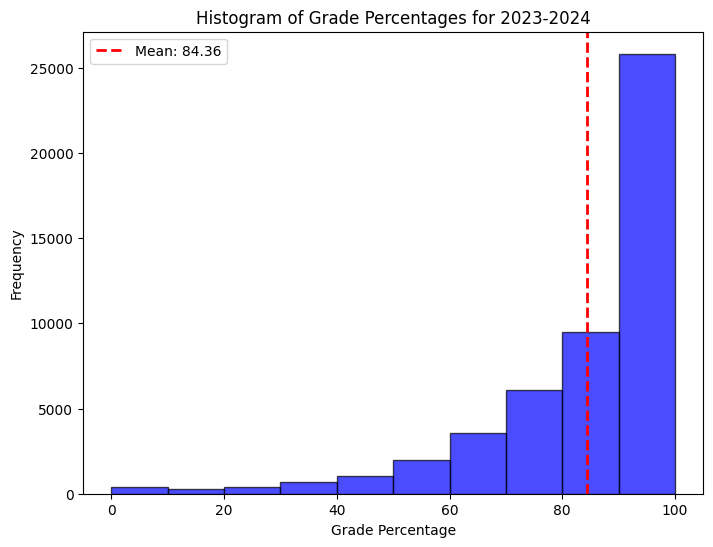

In [53]:
mean_value = df23['gradePercentage'].mean()

plt.figure(figsize=(8, 6))
plt.hist(df23['gradePercentage'], bins=10, alpha=0.7, color='blue', edgecolor='black')

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

plt.title('Histogram of Grade Percentages for 2023-2024')
plt.xlabel('Grade Percentage')
plt.ylabel('Frequency')
plt.legend()
plt.show()

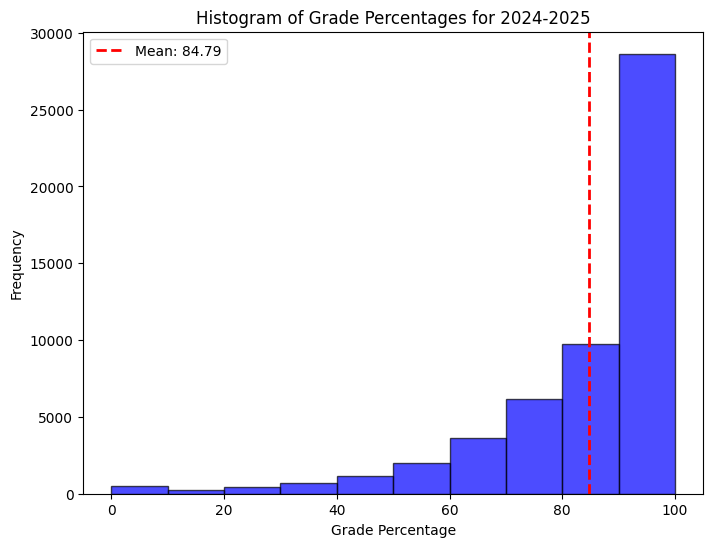

In [54]:
mean_value = df24['gradePercentage'].mean()

plt.figure(figsize=(8, 6))
plt.hist(df24['gradePercentage'], bins=10, alpha=0.7, color='blue', edgecolor='black')

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')

plt.title('Histogram of Grade Percentages for 2024-2025')
plt.xlabel('Grade Percentage')
plt.ylabel('Frequency')
plt.legend()


plt.show()

# Grade Percentage by Class Type

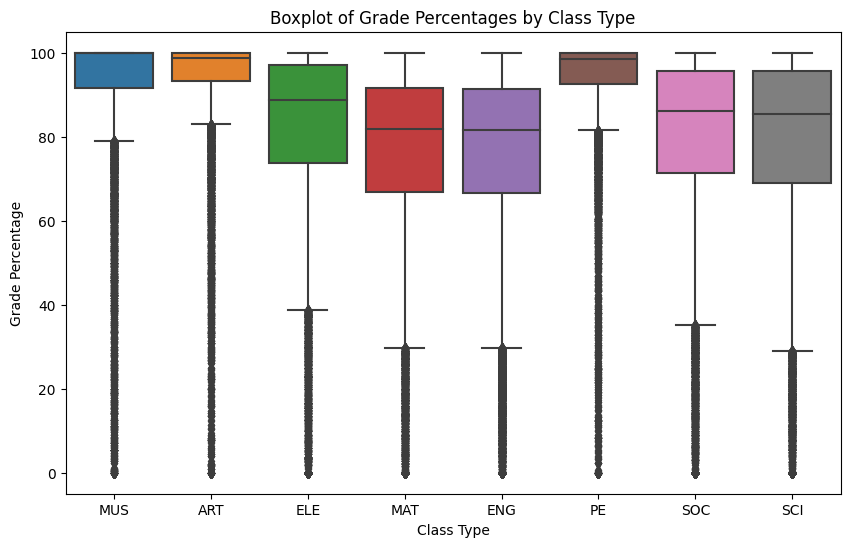

In [55]:
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.boxplot(x='classType', y='gradePercentage', data=df)

# Set the title and labels
plt.title('Boxplot of Grade Percentages by Class Type')
plt.xlabel('Class Type')
plt.ylabel('Grade Percentage')

# Show the plot
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

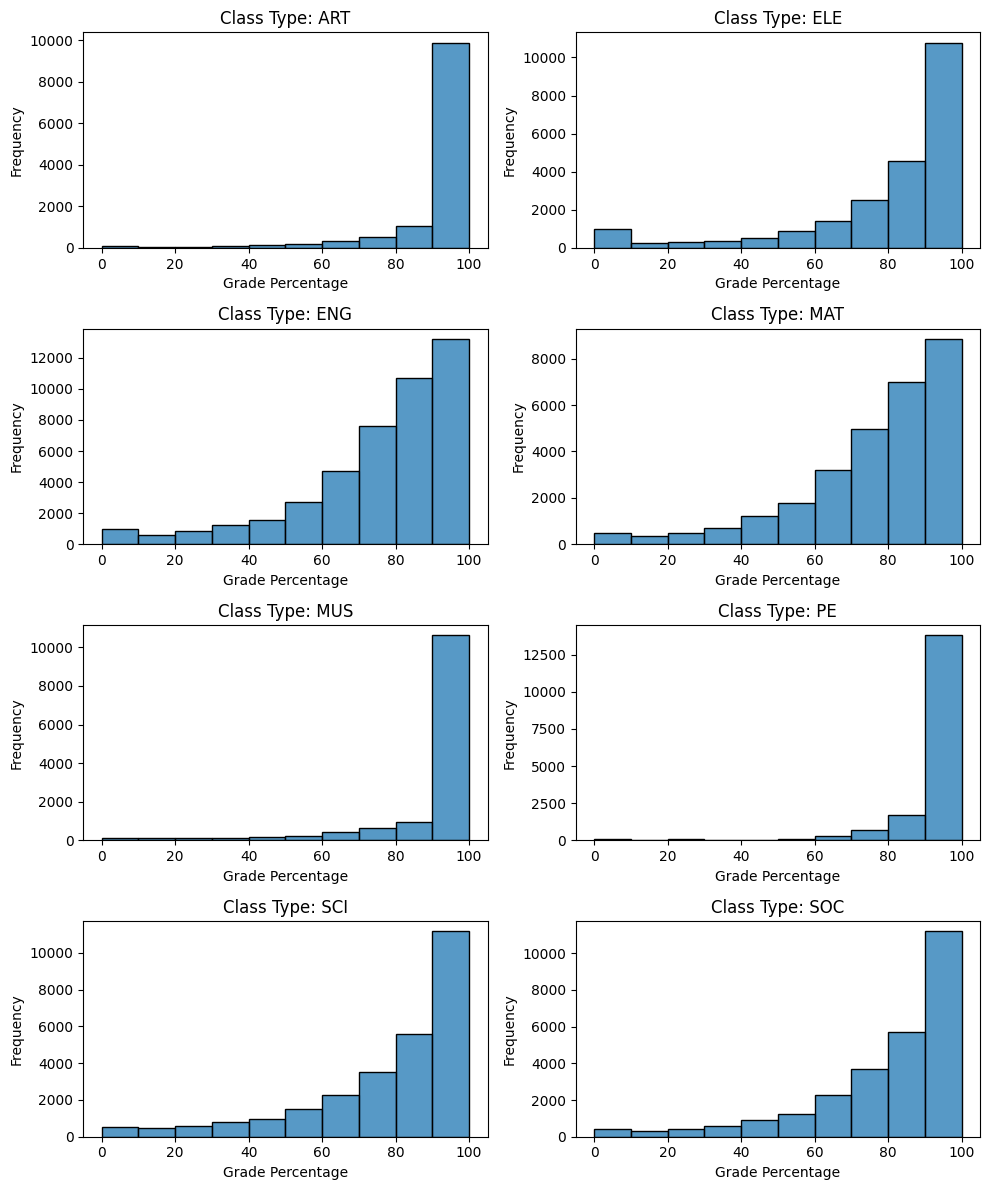

In [56]:
import warnings
#put the class types in their own bucket to enumerate 
class_types = df['classType'].unique()
class_types.sort()
fig, axes = plt.subplots(4, 2, figsize=(10, 12))  

axes = axes.flatten()

for i, class_type in enumerate(class_types):
    sns.histplot(df[df['classType'] == class_type]['gradePercentage'], bins=10, ax=axes[i])
    axes[i].set_title(f'Class Type: {class_type}')
    axes[i].set_xlabel('Grade Percentage')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Grade Percentage by Grade

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version

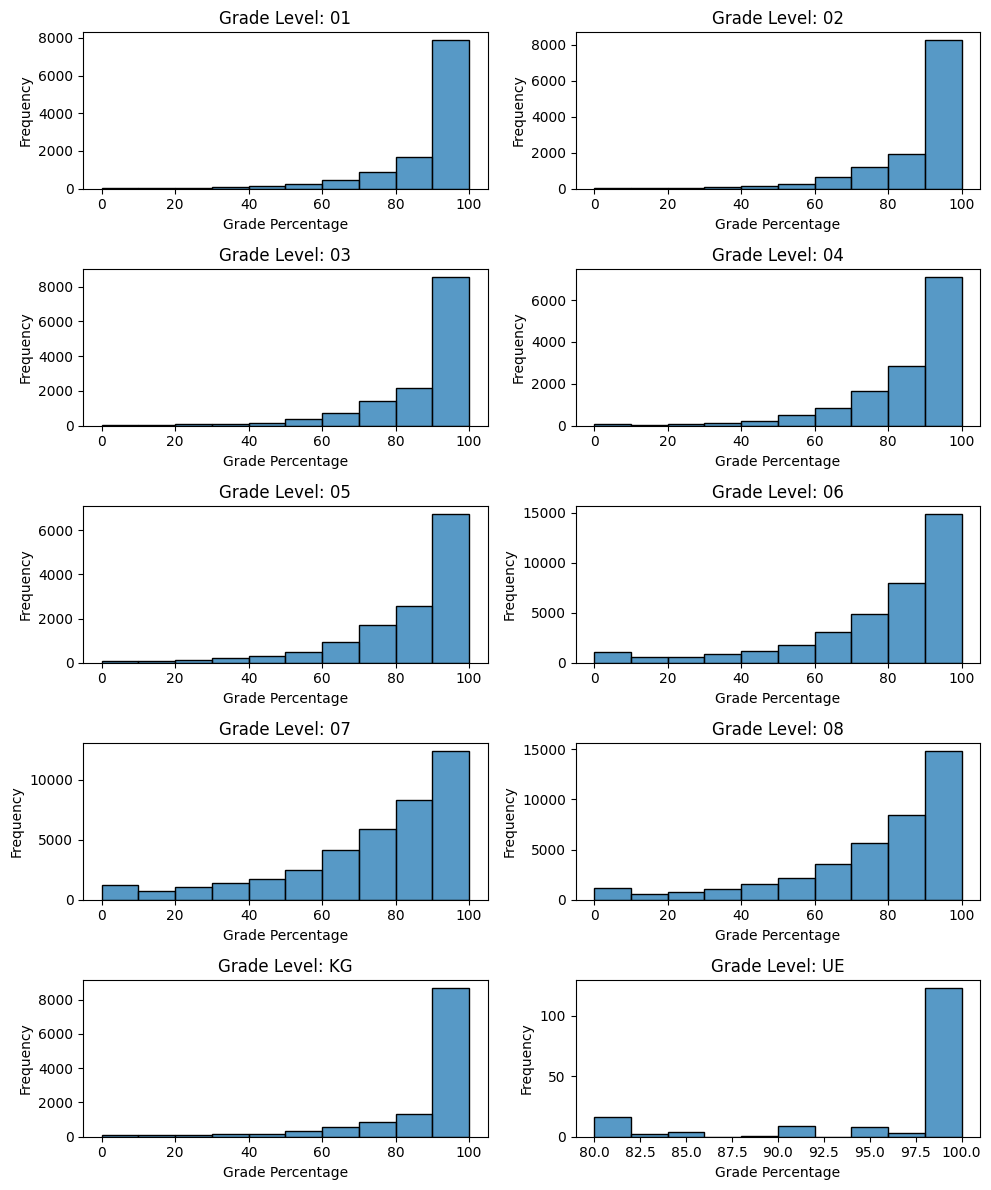

In [57]:
grades = df['gradeLevel'].unique()

grades.sort()

fig, axes = plt.subplots(5, 2, figsize=(10, 12))  
axes = axes.flatten()
for i, gradeLevel in enumerate(grades):
    sns.histplot(df[df['gradeLevel'] == gradeLevel]['gradePercentage'], bins=10, ax=axes[i])
    axes[i].set_title(f'Grade Level: {gradeLevel}')
    axes[i].set_xlabel('Grade Percentage')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()

plt.show()

# Grade Percentage by Student Program

In [58]:
# Filter data for ell and Non-ell
ell_counts = df23[df23['ell'] == 'Y']
non_ell_counts = df23[df23['ell'] == 'N']

In [59]:
grade_counts = df23.groupby(['ell', 'letterGrade']).size().reset_index(name='count')

total_counts = grade_counts.groupby('ell')['count'].transform('sum')
grade_counts['proportion'] = grade_counts['count'] / total_counts * 100  

fig = px.bar(
    grade_counts, 
    x='ell', 
    y='proportion', 
    color='letterGrade', 
    barmode='group', 
    text='proportion',
    title='23-24 School Year Proportion of Grade Distribution by ELL Status',
    labels={'ell': 'ell Status', 'proportion': 'Percentage (%)', 'letterGrade': 'Grade'}
)

grade_colors = {'A': 'green', 'B': 'yellow', 'C': 'red', 'D': 'orange', 'F': 'purple'}
fig.for_each_trace(lambda trace: trace.update(marker_color=grade_colors[trace.name]))

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(width=700, height=600)

fig.show()

In [60]:
grade_counts = df23.groupby(['avid', 'letterGrade']).size().reset_index(name='count')

total_counts = grade_counts.groupby('avid')['count'].transform('sum')
grade_counts['proportion'] = grade_counts['count'] / total_counts * 100  

fig = px.bar(
    grade_counts, 
    x='avid', 
    y='proportion', 
    color='letterGrade', 
    barmode='group', 
    text='proportion',
    title='23-24 School Year Proportion of Grade Distribution by AVID Status',
    labels={'ell': 'ell Status', 'proportion': 'Percentage (%)', 'letterGrade': 'Grade'}
)

grade_colors = {'A': 'green', 'B': 'yellow', 'C': 'red', 'D': 'orange', 'F': 'purple'}
fig.for_each_trace(lambda trace: trace.update(marker_color=grade_colors[trace.name]))

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(width=700, height=600)

fig.show()

In [61]:
grade_counts = df23.groupby(['sped', 'letterGrade']).size().reset_index(name='count')

total_counts = grade_counts.groupby('sped')['count'].transform('sum')
grade_counts['proportion'] = grade_counts['count'] / total_counts * 100  

fig = px.bar(
    grade_counts, 
    x='sped', 
    y='proportion', 
    color='letterGrade', 
    barmode='group', 
    text='proportion',
    title='23-24 School Year Proportion of Grade Distribution by sped Status',
    labels={'ell': 'ell Status', 'proportion': 'Percentage (%)', 'letterGrade': 'Grade'}
)

grade_colors = {'A': 'green', 'B': 'yellow', 'C': 'red', 'D': 'orange', 'F': 'purple'}
fig.for_each_trace(lambda trace: trace.update(marker_color=grade_colors[trace.name]))

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(width=700, height=600)

fig.show()

In [62]:
grade_counts = df23.groupby(['migrant', 'letterGrade']).size().reset_index(name='count')

total_counts = grade_counts.groupby('migrant')['count'].transform('sum')
grade_counts['proportion'] = grade_counts['count'] / total_counts * 100  

fig = px.bar(
    grade_counts, 
    x='migrant', 
    y='proportion', 
    color='letterGrade', 
    barmode='group', 
    text='proportion',
    title='23-24 School Year Proportion of Grade Distribution by migrant Status',
    labels={'ell': 'ell Status', 'proportion': 'Percentage (%)', 'letterGrade': 'Grade'}
)

grade_colors = {'A': 'green', 'B': 'yellow', 'C': 'red', 'D': 'orange', 'F': 'purple'}
fig.for_each_trace(lambda trace: trace.update(marker_color=grade_colors[trace.name]))

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')
fig.update_layout(width=700, height=600)

fig.show()

In [63]:
df.columns

Index(['schoolyear', 'gradeLevel', 'classPeriod', 'classType', 'schoolName',
       'gradePercentage', 'avid', 'sped', 'migrant', 'ell', 'student_ID',
       'letterGrade'],
      dtype='object')

In [64]:
avg_grades = df.groupby(['schoolName', 'gradeLevel'])['gradePercentage'].mean().reset_index()

fig = go.Figure()

schools = avg_grades['schoolName'].unique()

for school in schools:
    filtered_data = avg_grades[avg_grades['schoolName'] == school]
    fig.add_trace(
        go.Bar(
            x=filtered_data['gradePercentage'],
            y=filtered_data['gradeLevel'],
            orientation='h',  
            name=school,
            visible=False  
        )
    )

fig.data[0].visible = True


dropdown_buttons = [
    {
        'label': school,
        'method': 'update',
        'args': [
            {'visible': [school == s for s in schools]},  
            {'title': f'Cumulative Average Grade Percentage for {school}'}  
        ]
    }
    for school in schools
]


fig.update_layout(
    updatemenus=[
        {
            'buttons': dropdown_buttons,
            'direction': 'down',
            'showactive': True,
            'x': 1.15, 
            'y': 1.2
        }
    ],
    title='Average Grade Percentage by Grade Level',
    xaxis_title='Grade Percentage',
    yaxis_title='Grade Level',
    height=600,
    width=800
)

fig.show()

In [65]:
avg_elem_school_grades = df.groupby('schoolName')['gradePercentage'].mean().reset_index()

avg_elem_school_grades =avg_elem_school_grades.sort_values('gradePercentage')

print(avg_elem_school_grades)

                            schoolName  gradePercentage
3                     East Junior High        73.597141
14                   South Junior High        74.797355
11              Online Learning School        76.477514
0             Allfeather Middle School        77.219041
18                    West Junior High        77.258689
10                   North Junior High        77.919750
15    Sunny Hillside Elementary School        82.772678
17  Washington Stone Elementary School        83.037699
7               Hall Elementary School        83.277585
4         Elk Meadow Elementary School        84.175245
8              Leafy Elementary School        84.582063
9      Maria Flowers Elementary School        86.798254
1             Circle Elementary School        87.768919
6        Grand River Elementary School        88.060111
12             Rocky Elementary School        88.246425
2             Cloudy Elementary School        89.341741
13           Seaside Elementary School        89

# Student Enrollment

In [66]:
middleSchooldf = df[df['schoolName'].str.contains('Junior High', case=False, na=False)]

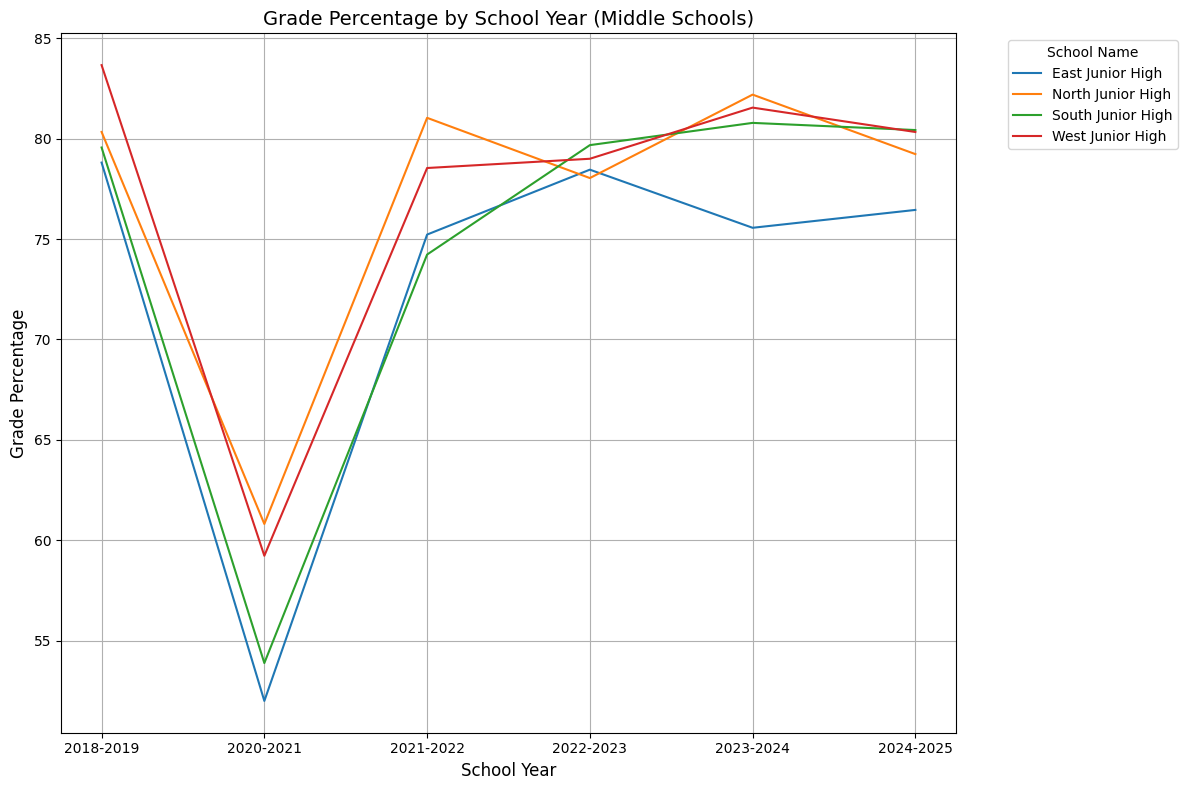

In [67]:
middleSchooldf = middleSchooldf.sort_values(by='schoolyear')

pivot_data = middleSchooldf.pivot_table(
    index='schoolyear', columns='schoolName', values='gradePercentage', aggfunc='mean'
)

plt.figure(figsize=(12, 8))
for school in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[school], label=school)

plt.title('Grade Percentage by School Year (Middle Schools)', fontsize=14)
plt.xlabel('School Year', fontsize=12)
plt.ylabel('Grade Percentage', fontsize=12)
plt.legend(title='School Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()

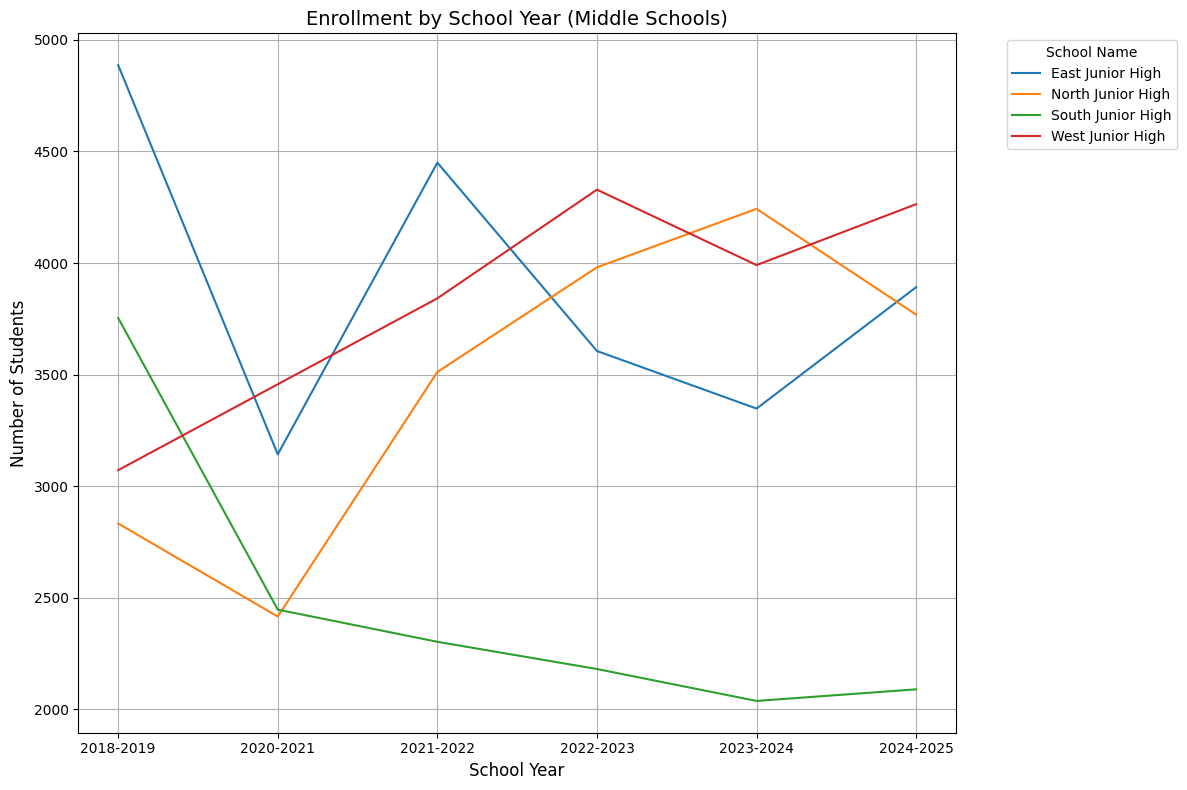

In [68]:
pivot_data = middleSchooldf.pivot_table(
    index='schoolyear', columns='schoolName', values='student_ID', aggfunc='count'
)

plt.figure(figsize=(12, 8))
for school in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[school], label=school)

plt.title('Enrollment by School Year (Middle Schools)', fontsize=14)
plt.xlabel('School Year', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.legend(title='School Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

plt.show()